In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. `Character data types` and common issues.
#### PostgreSQL character types

| `Types` | Descriptions |
|:-|:-|
|**`character(n)`** or **`char(n)`**| **fixed length** `n`; trailing spaces ignored in comparisions. |
|**`character varying(n)`** or **`varchar(n)`** | **variable length** up to maximum `n` |
|**`text`** or **`varchar`** | **unlimited length** when obmiting `n` |

#### Types of `text data`

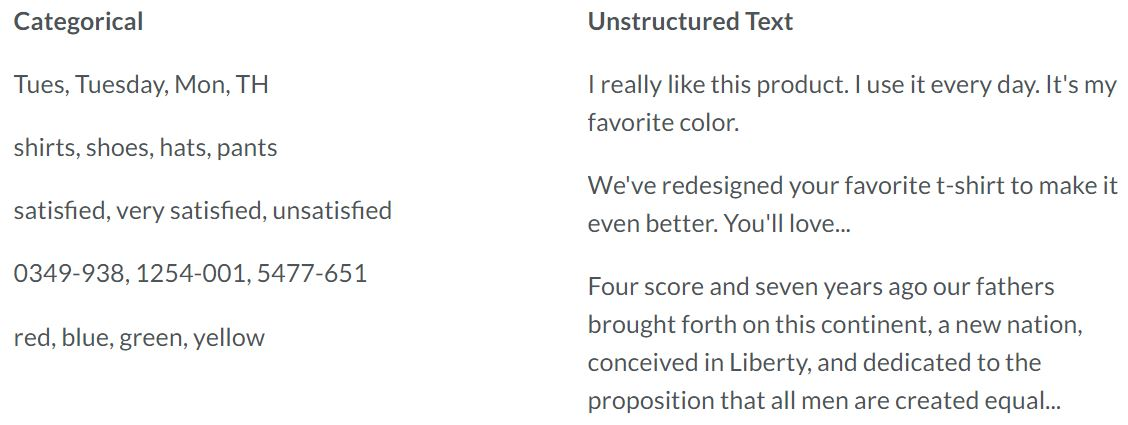

In [2]:
###

#### Grouping & counting.

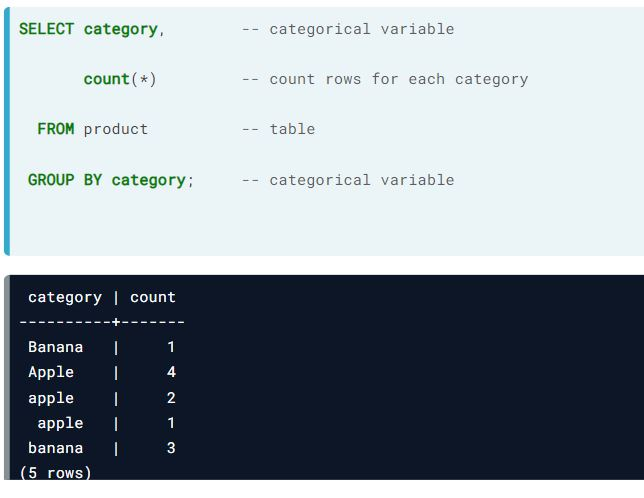

In [3]:
###

### `Order` in `text data`
$\qquad \diamond$ **`ORDER`: most frequent values.**

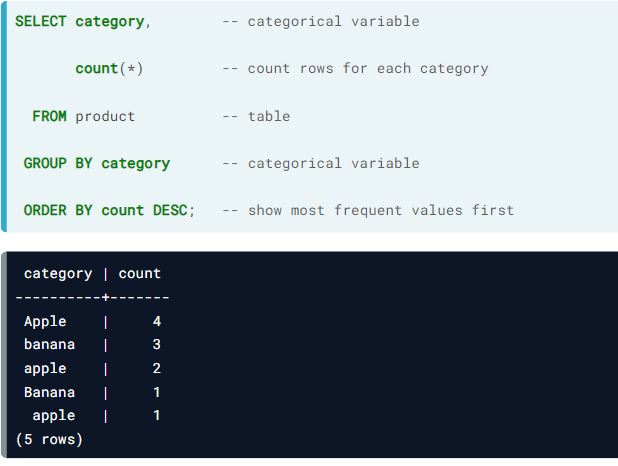

In [4]:
####

$\qquad \diamond$ **`ORDER`: in `alphabetical`.**

$\quad \qquad \bullet$ **`RULEs`**:

                        1)   '' < 'A' < 'a'
                        2)   '' < 'A' < 'B' < 'a' < 'b'

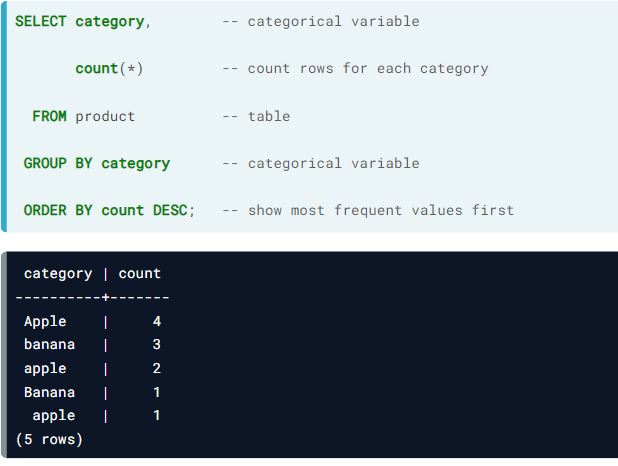

In [5]:
####

#### `Common issues` in `text data`.

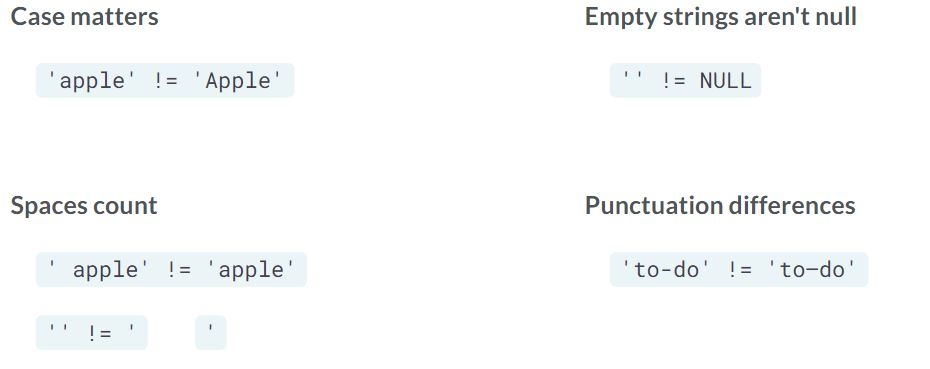

In [6]:
####

### EXERCISEs.
#### Exercise 1.1. Count the categories
$\qquad$ In this chapter, we'll be working mostly with the `Evanston 311` data in table `evanston311`. This is data on help requests submitted to the city of `Evanston, IL`.

$\qquad$ This data has several character columns. Start by examining the **`most frequent values`** in some of these columns to get familiar with the `common categories`.

#### Instructions
**Step 1.** How many `rows` does each `priority level` have?

**SOLUTION.**

                -- Select the count of each level of priority
                SELECT priority, COUNT(*)
                FROM evanston311
                GROUP BY priority;
- **`query result`.**

priority|count
:-|-:
MEDIUM|5745
NONE|30081
HIGH|88
LOW|517

**Step 2.** How many `distinct values` of `zip` appear in at `least 100 rows`?

**SOLUTION.**

                SELECT DISTINCT zip, COUNT(*)
                FROM evanston311
                GROUP BY zip
                HAVING count(*) >= 100; 
- **`query result`.**

zip|count
:-|:-
60201|19054
60202|11165
60208|255
null|5528


**Step 3.** How many `distinct values` of `source` appear in `at least 100 rows`?

**SOLUTION.**

                    SELECT DISTINCT source, COUNT(*)
                    FROM evanston311
                    GROUP BY source
                    HAVING count(*) >= 100; 
- **`query result`.**

source|count
:-|:-
Android|444
Iframe|3670
gov.publicstuff.com|30985
iOS|1199

**Step 4.** Select the five most common values of street and the count of each.

**SOLUTION.**

                    SELECT street, COUNT(*)
                    FROM evanston311
                    GROUP BY street 
                    ORDER BY count(*) DESC
                    LIMIT 5;
- **`query result`.**

street|count
:-|:-
null|1699
Chicago Avenue|1440
Sherman Avenue|1276
Central Street|1211
Davis Street|1154

- **Comments.** Becoming familiar with `common categorical values` helps you learn **`what to expect from your data`**.

#### Exercise 1.2. `Spotting character data` problems.
$\qquad$ Explore the `distinct` values of the `street` column. 

$\qquad$ Select each `street` value and the `count` of the number of `rows` with that value. 

$\qquad$ `Sort` the results by street to see similar values near each other.

Which of the following is **NOT** an `issue` you see with the values of `street`?

- `A`. The `street` `suffix` (e.g. `Street`, `Avenue`) is sometimes abbreviated
- `B`. There are sometimes `extra spaces` at the beginning and end of values
- `C`. `House/street` `numbers` sometimes appear in the column
- `D`. `Capitalization` is not `consistent` across values
- `E`. All of the above are potential problems

**SOLUTION.**
$\quad \diamond$ Firstly, look at the following commands and its result

                        SELECT DISTINCT street
                        FROM evanston311
                        WHERE street LIKE 'A%' AND (street LIKE '%Avenue') OR (street LIKE '%Ave')
                        ORDER BY street
                        LIMIT 15
$\qquad$ **`result`.**

|street
|:-
|1/2 Chicago Ave
|1047B Chicago Ave
|141A Callan Ave
|141b Callan Ave
|217A Dodge Ave
|221c Dodge Ave
|300c Dodge Ave
|613B Custer Ave
|Asbury Ave
|Asbury Avenue
|Ashland Ave
|Ashland Avenue
|Barton Ave
|Bennett Ave
|Benson Ave

$\quad \diamond$ Next, verify the `extra spaces` in the `begining` or `ending`

                SELECT COUNT(*) FROM( SELECT DISTINCT street
                                      FROM evanston311
                                      WHERE (street LIKE ' %') OR (street LIKE '% ')
                                      ) AS count_extra_spaces
$\qquad$ **`result`.**

| count |
|:-:|
|0 |

$\quad \diamond$ Finally, we will answer and explain the reason.

- *A. Wrong!!* This problem exists. Example: `Ashland Ave` and `Ashland Avenue`.
- **B. Correct!!!** `street` values do not have `extra spaces`. You could verify this with a `LIKE query` as in the second step.
- *C. Incorrect!!* `House/street` numbers that contain letters or punctuation have been erronously included in the street values; such as `1/2 Chicago Ave`.
- *D. Wrong!!* The `capitalization` is fairly `consistent`, but there are `values` or `partial values` in all `lowercase`.
- *E. Incorrect!!* Since the option `B` is correct, that meant **at least** one item in this list is **NOT** the problem with `street` value.

## 2. Cases and spaces.
### Converting `CASE`: `upper` and `lower`

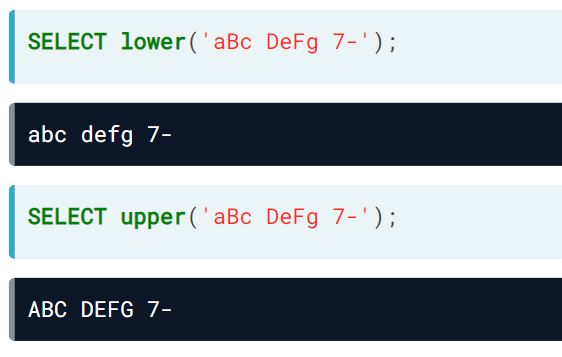

In [7]:
####

#### `Case` sensitive `comparision`

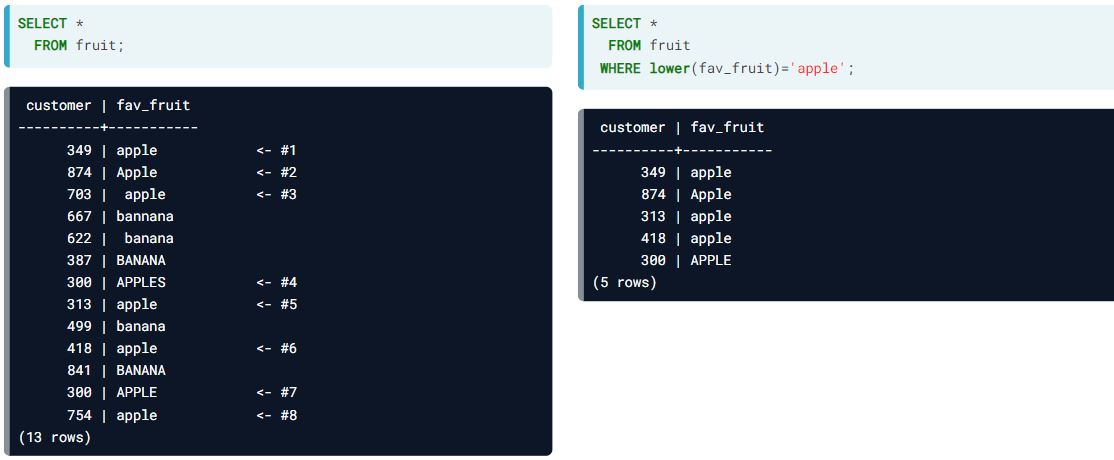

In [8]:
####

#### `Case` sensitive `search` with `LIKE`

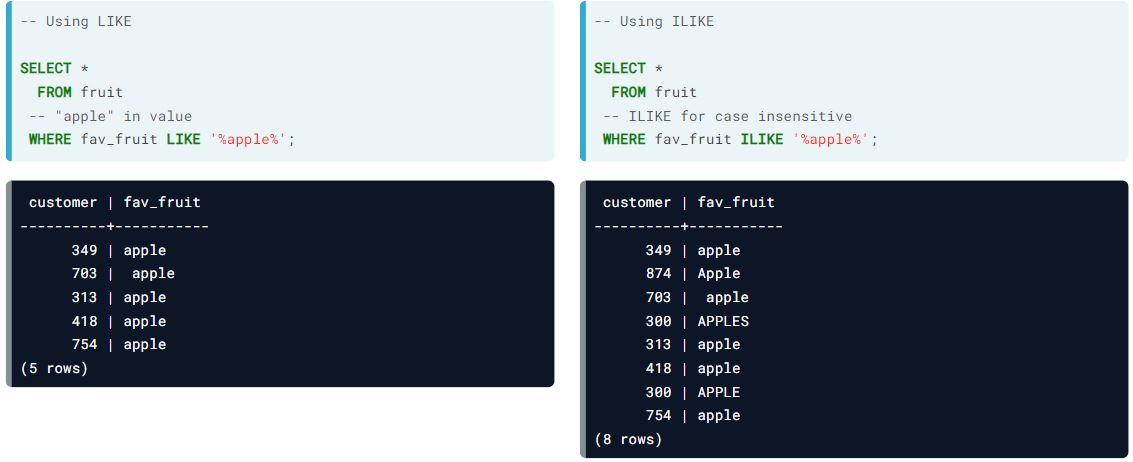

In [9]:
####

$\qquad \diamond$ **`LIKE '%character%'`** to search the words **contains** the `character` in a certain column, while

$\qquad \diamond$ **`LIKE '%character%'`** to search the words **contains** the `character` in a certain column **regardless `case`**, e.g., `'apple'` is the same with `'Apple', 'APPLE', ...`

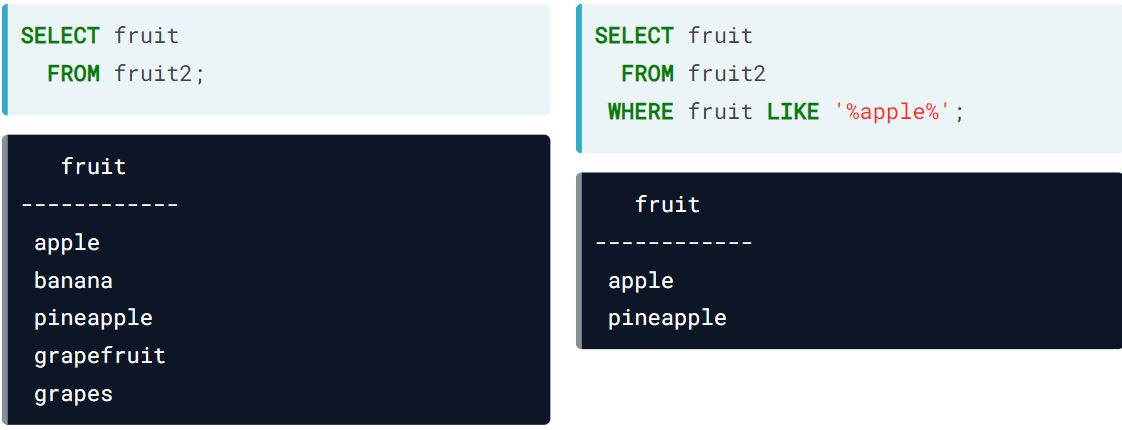

In [10]:
####

### `TRIMMING` spaces.
Removes the `spaces` in your `characters`!

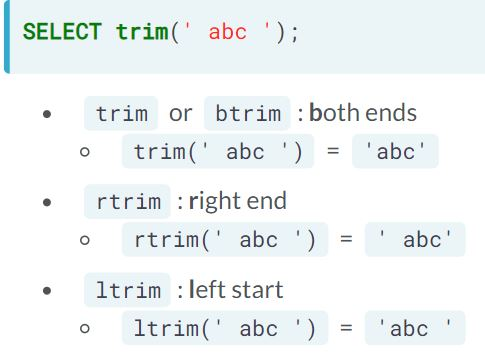

In [11]:
####

#### `TRIMMING` the `other values` in the `given characters`
$\qquad \diamond$ **`SYNTAX.`**
    
                        TRIM(val_1, val_2)
$\qquad \diamond$ **Usages.** Removes the `val_2` which contains in `val_1`

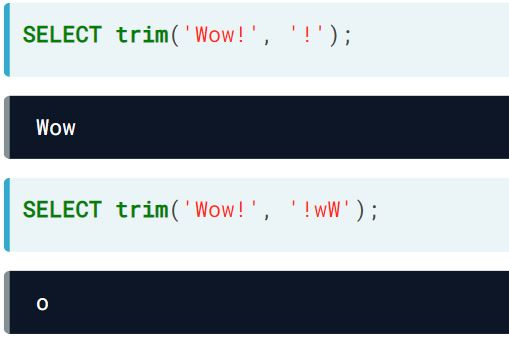

In [12]:
####

$\qquad \diamond$ **Combining function.**

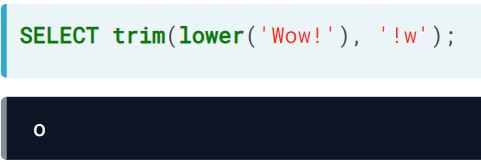

In [13]:
####

### EXERCISE
#### Exercise 2.1. `Trimming`
$\qquad$ Some of the `street` values in `evanston311` include house numbers with `#` or `/` in them. In addition, some street values `end` in a `..`

$\qquad$ `Remove` the `house numbers`, `extra punctuation`, and `any spaces` from the `beginning` and `end` of the `street` values as a `first attempt` at cleaning up the values.

#### Instructions
- `Trim` digits `0-9`, `#`, `/`, `.`, and `spaces` from the `beginning` and `end` of `street`.
- `Select` `distinct original street` value and the `corrected street value`.
- `Order` the results by the `original street` value.

**SOLUTION.**

                        SELECT distinct street,
                               TRIM(street, '0123456789 #/.') AS cleaned_street
                          FROM evanston311
                         ORDER BY street;

- **`query result`.**

street|cleaned_street
:-|:-
1/2 Chicago Ave|Chicago Ave
1047B Chicago Ave|B Chicago Ave
13th Street|th Street
141A Callan Ave|A Callan Ave
141b Callan Ave|b Callan Ave
1624B Central St|B Central St
217A Dodge Ave|A Dodge Ave
221c Dodge Ave|c Dodge Ave
300c Dodge Ave|c Dodge Ave
3314A Central St|A Central St
...|...
Woodland Road|Woodland Road
benson st north of clark|benson st north of clark
chicago ave and church st|chicago ave and church st
church street and oak ave|church street and oak ave
corner of Grant and McDaniel|corner of Grant and McDaniel
davis and benson evanston il|davis and benson evanston il
davis and maple|davis and maple
sheridan rd evanston il|sheridan rd evanston il
street|cleaned_street
unknown|unknown
null|null

- **Comments.** 

$\qquad \diamond$ Note that the `"cleaned" values` **still `include letters`** from `house numbers`; such as `1047B Chicago Ave` to `B Chicago Ave`, and `trim()` **`stripped off`** `some numbers that belong as part of road names`. 

$\qquad \diamond$ It can take several tries to find the `right combination` of `functions` to `clean up messy values`.

#### Exercise 2.2.  Exploring unstructured text
$\qquad$ The description column of `evanston311` has the details of the `inquiry`, while the `category` column groups inquiries into different types. How well does the category capture what's in the `description`?

$\qquad$ `LIKE` and `ILIKE` `queries` will help you find relevant `descriptions` and `categories`. Remember that with `LIKE` `queries`, you can include a `%` on each side of a word to find values that contain the word. For example:

                    SELECT category
                      FROM evanston311
                     WHERE category LIKE '%Taxi%';
`%` matches `0` or `more characters`.

Building up the `query` through the steps below, find inquires that mention trash or `garbage` in the `description` without `trash` or `garbage` being in the `category`. What are the most frequent categories for such inquiries?
#### Instructions.
**Step 1.** Use `ILIKE` to count rows in `evanston311` where the `description` contains `'trash'` or `'garbage'` regardless of case.

**SOLUTION.**

                -- Count rows
                SELECT COUNT(*)
                FROM evanston311
                WHERE (description ILIKE '%trash%') OR (description ILIKE '%garbage%')
- **`query result`.**                

| count |
|:-:|
| 2551 |

**Step 2.** `category` values are in title case. Use `LIKE` to find `category` values with `'Trash'` or `'Garbage'`.

**SOLUTION.**

                    -- Select categories containing Trash or Garbage
                    SELECT category
                    FROM evanston311
                    WHERE category LIKE '%Trash%' OR category LIKE '%Garbage%'
- **`query result`.**

|category
|:-
|DO NOT USE Trash - Small Electronic Appliance Pick-up
|Garbage - Overflow, odorous
|THIS REQUEST IS INACTIVE...Trash Cart - Compost Bin
|Trash - Accumulation
|Trash - Appliance Pickup
|Trash - Garbage in Parks or Right of Way
|Trash - Missed Bulk Pickup
|Trash - Missed Garbage Pickup
|Trash - Overflowing Garbage Dumpster
|Trash - Special Pickup (STAFF ONLY)
|Trash - Special Pickup - Resident Use
|Trash - Tire Pickup
|Trash Cart - Downsize, Upsize or Remove
|Trash Cart, Recycling Cart - Missing
|Trash, Recycling, Yard Waste Cart- Repair/Replacement

**Step 3.** Count rows where the `description` includes `'trash'` or `'garbage'` but the `category` does not.

**SOLUTION.**

                    SELECT COUNT(*) FROM evanston311 
                    WHERE (description ILIKE '%trash%'
                        OR description ILIKE '%garbage%') 
                       AND category NOT LIKE '%Trash%'
                       AND category NOT LIKE '%Garbage%';
- **`query result`.**

| count |
|:-:|
| 570 |

**Step 4.** Find the most common `categories` for `rows` with a `description` about `trash` that don't have a `trash`-related `category`.

**SOLUTION.**

                    SELECT category, COUNT(*) -- Count rows with each category
                    FROM evanston311 
                    WHERE (description ILIKE '%trash%'
                        OR description ILIKE '%garbage%') 
                       AND category NOT LIKE '%Trash%'
                       AND category NOT LIKE '%Garbage%'
                    GROUP BY category
                    ORDER BY count(*) DESC
                    LIMIT 10;

- **`query result`.**

category|count
:-|:-
Ask A Question / Send A Message|273
Rodents- Rats|77
Recycling - Missed Pickup|28
Dead Animal on Public Property|16
Graffiti|15
Yard Waste - Missed Pickup|14
Public Transit Agency Issue|13
Food Establishment - Unsanitary Conditions|13
Exterior Conditions|10
Street Sweeping

- **Comments.** The `results` include some `categories` that appear to be `related to trash`, while `others are more general`.

## 3. `Splitting` and `concatenating text`.
### `Substrings`
$\qquad \diamond$ `LEFT, RIGHT` functions.

| `Functions syntax` | `Params_Descriptions` | Usages |
|:-:|:-:|:-:|
| `LEFT(text, n)` | `text`: `str`; `n` : `int` is the number of characters | Extract the **first `n` characters** in the `text` |
| `RIGHT(text, n)` | `text`: `str`; `n` : `int` is the number of characters | Extract the **last `n` characters** in the `text` |

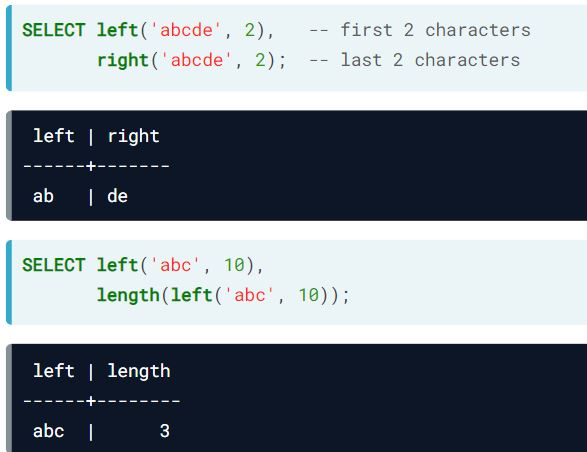

In [14]:
####

$\qquad \diamond$ `substring` and `substr` functions.

| `Functions syntax` | `Params_Descriptions` | Usages |
|:-|:-:|:-:|
| `substring(text FROM k FOR n)` | `text`: `str`; `n, k`: `int` | Extract from the `k` `th` character in `text` with length = `n` |
| `substr(text, k, n)` | `text`: `str`; `n, k`: `int` | Extract from the `k` `th` character in `text` with length = `n` |

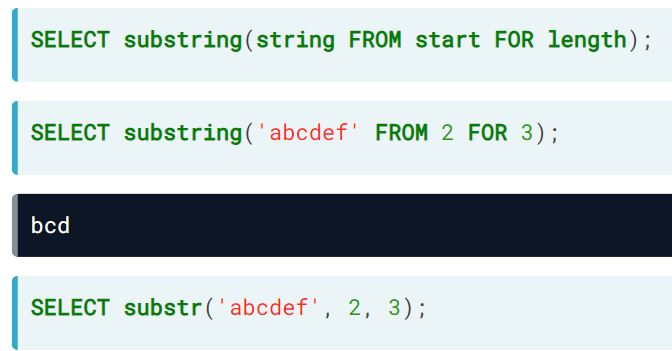

In [15]:
####

#### Delimiters

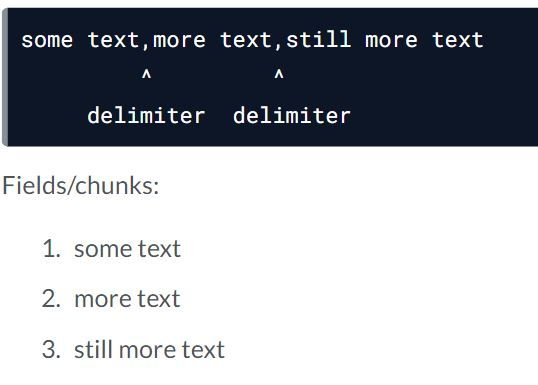

In [16]:
####

$\qquad \diamond$ **Spliting on `delimiters`** with **`split_part`**

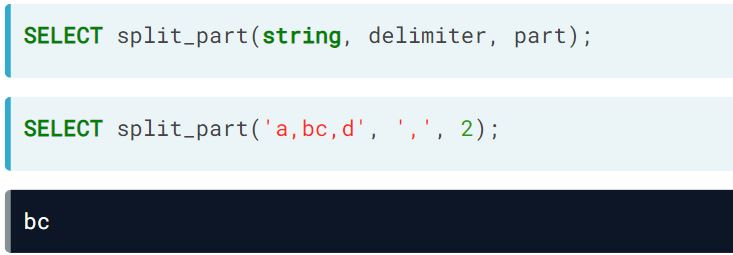

In [17]:
####

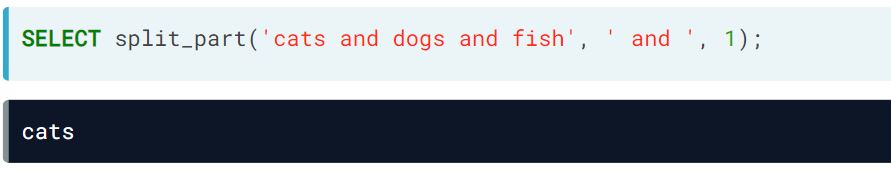

In [18]:
####
Image(r"C:\Users\Admin\Desktop\fig17.JPG", width = 450, height = 300)

#### Concatenating `text`.

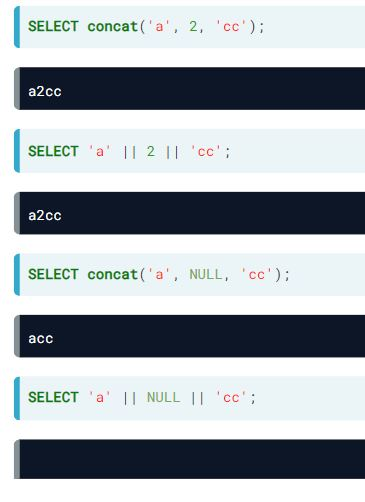

In [19]:
####

### EXERCISEs
#### Exercise 3.1. Concatenate strings
$\qquad$ House number (`house_num`) and `street` are in two separate columns in `evanston311`. `Concatenate` them together with `concat()` with a `space` in between the values.

#### Instructions
- Concatenate `house_num`, a `space ' '`, and `street` into a single value using the `concat()`.
- Use a `trim` function to remove any spaces from the start of the concatenated value.

**SOLUTION.**

                    SELECT TRIM(CONCAT(house_num, ' ', street)) AS address
                    FROM evanston311;
- **`query result`.**

|address
|:-
|606-612 Sheridan Road
|930 Washington St
|1183-1223 Lincoln St
|1–111 Callan Ave
|1524 Crain St
|2830 Central Street
|1139 Dodge Ave
|900 Oakton Street
|608 Oakton Street
|1320 Dewey Avenue
|...
|1298 Chicago Avenue
|525 Kedzie St
|2227 Grant St
|2327 Brown Ave
|1000 Grove Street
|1804 Greenleaf St
|630 Pitner Ave
|828 Judson Ave
|350 Kedzie St
|700 Washington Street

- **Comments.** When `joining` values that might be `NULL` with a `separator` between them, consider using the `concat_ws()` function, which you can read about in the `PostgreSQL documentation`, to avoid `duplicate or unnecessary separators` in the result.

#### Exercise 3.2. Split strings on a delimiter
$\qquad$ The `street` `suffix` is the `part of` the `street name` that gives the `type of street`, such as `Avenue`, `Road`, or `Street`. In the `Evanston 311` data, sometimes the street suffix is the full word, while other times it is the abbreviation.

$\qquad$ Extract just the `first word` of each `street` value to find the `most common streets` **regardless of the `suffix`**.

To do this, use

                    split_part(string_to_split, delimiter, part_number)
#### Instructions
- Use `split_part()` to select the `first word` in `street`; alias the result as `street_name`.
- Also select the `count` of each value of `street_name`.

**SOLUTION.**

                        -- Select the first word of the street value
                        SELECT SPLIT_PART(street, ' ', 1) AS street_name, 
                               count(*)
                        FROM evanston311
                        GROUP BY street_name
                        ORDER BY count DESC
                        LIMIT 20;
- **`query result`.**

street_name|count
:-|:-:
null|1699
Chicago|1569
Central|1529
Sherman|1479
Davis|1248
Church|1225
Main|880
Sheridan|842
Ridge|823
Dodge|816
Maple|778
Asbury|675
Hinman|586
West|578
Orrington|561
Emerson|513
Grove|498
Darrow|489
Custer|464
Lake|444

- **Comments.** There are `1699` `streets` in the `evanston311` table don't have a specific `name`.

#### Exercise 3.3. Shorten long strings
$\qquad$ The `description` column of `evanston311` can be very long. You can get the length of a string with the `length()` function.

$\qquad$ For displaying or quickly reviewing the data, you might want to only display the first few characters. You can use the `left()` function to get a specified number of characters at the start of each value.

$\qquad$ To indicate that more data is available, `concatenate` `'...'` to the end of any shortened `description`. To do this, you can use a `CASE WHEN` statement to add `'...'` only when the string length is greater than 50.

$\qquad$ Select the first 50 characters of `description` when `description` starts with the word `"I"`.

#### Instructions
- Select the first 50 characters of `description` with `'...'` concatenated on the end where the `length()` of the `description` is greater than 50 characters. Otherwise just select the description as `is`.

- Select only `descriptions` that begin with the word 'I' and not the letter `'I'`.

$\qquad \diamond$ For example, you would want to select `"I like using SQL!"`, but would not want to select `"In this course we use SQL!"`.

**SOLUTION.**

                    SELECT CASE WHEN length(description) > 50       -- if len > 50, 
                                THEN left(description, 50) || '...' -- select the first 50 characters and add ...
                           ELSE description                         -- else, keep the original
                           END
                    FROM evanston311
                    WHERE description LIKE 'I %'             -- limit to descriptions that start with the word I
                    ORDER BY description;

- **`query result`.**

|description
|:-
I  work for Schermerhorn & Co. and manage this con...
I Live in a townhouse with garbage cans in back, i...
I Put In For Reserve Disabled Parking, A Week Ago ...
I SDO GOWANS #1258 RECEIVED A TELEPHONE CALL ON 3/...
I accidentally mistyped my license plate number - ...
I accidentally sent the wrong cover letter on my a...
I acquired c diff at north shore hospital in Evans...
I am a 35 year resident of Evanston (314 Custer Av...
I am a Cubs fan and watched game seven. But using ...
I am a Northwestern student that has accumulated t...
|---
I would like to request a rat bait box in my back ...
I would like to request participation in the 50/50...
I would like to request that the city consider ins...
I would like to schedule a final inspection for ne...
I would like to see if the city could put a  do no...
I would like to see my water charges for the last ...
I would like to speak with someone from the fire d...
I would like to start new water service at this ad...
I would love to come on Thursday June 1st anytime ...
I would request that Rajeev Dahal (Public Works) a...


- **Comments.** Shortening long fields can help you scan the values quickly and spot patterns you might not otherwise see.

## 4. Strategies for multiple transformations
First, look at the table below.

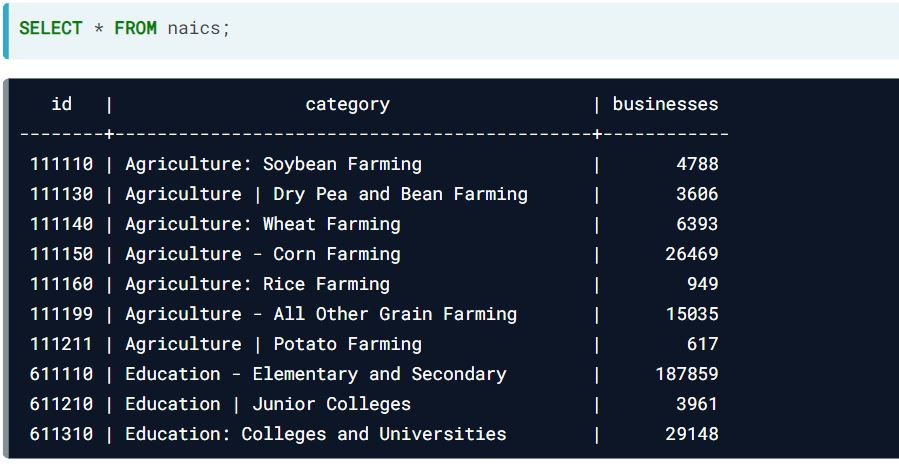

In [20]:
####

#### `CASE WHEN ... THEN`

**`Syntax`.**

            CASE WHEN condition_1 THEN statement_1
                 WHEN condition_2 THEN statement_2
                 ...
                 ELSE otherwise
            END 

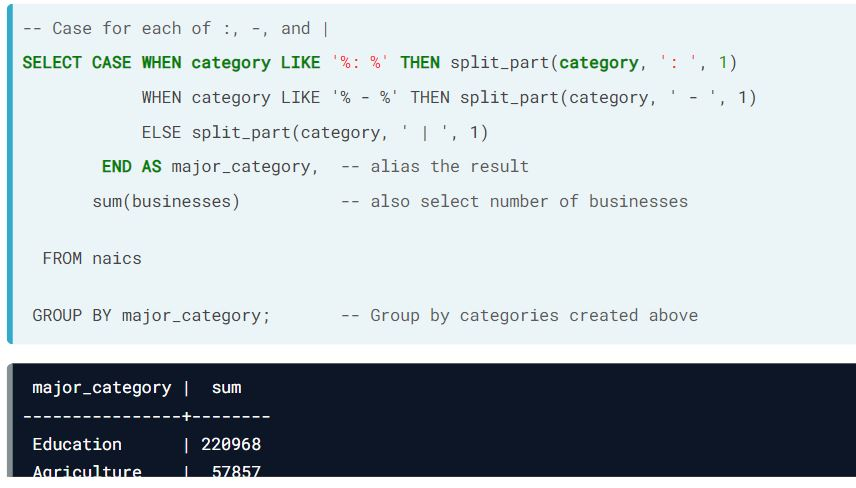

In [21]:
####

#### Standardized values, recode table.

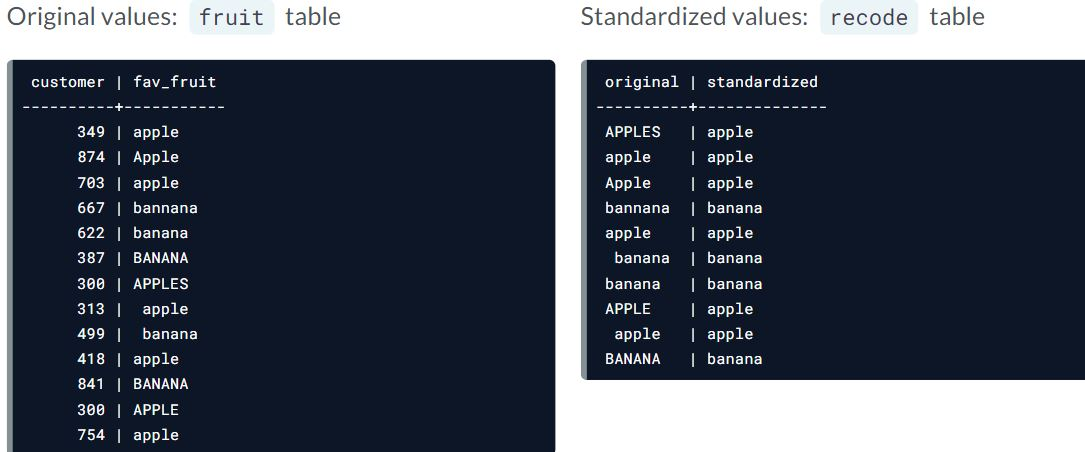

In [22]:
####

$\qquad \diamond$ **Step 1. `CREATE TEMP TABLE`.** 

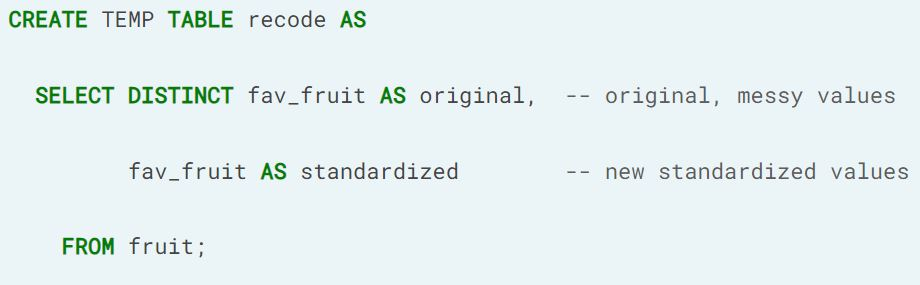

In [23]:
####

**Initial table.**

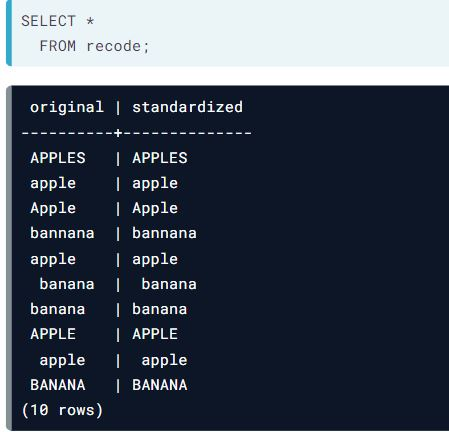

In [24]:
####

$\qquad \diamond$ **Step 2. `UPDATE`** 

$\quad \qquad \bullet$ **`UPDATE` values. `table_name`**

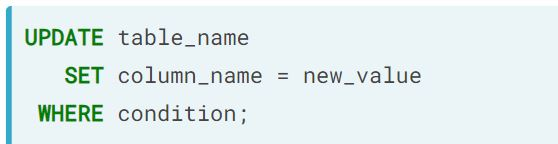

In [25]:
####

$\qquad \quad \bullet$ **`UPDATE` values. `recode`**

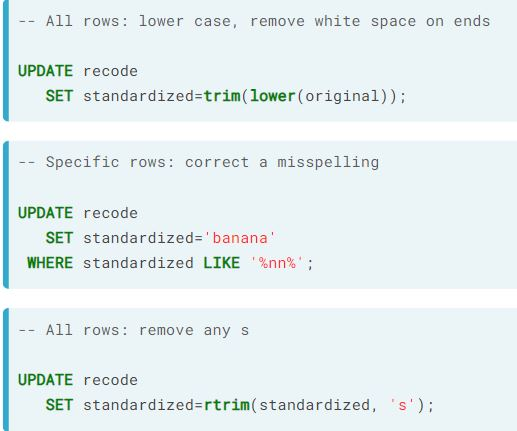

In [26]:
####

$\qquad \diamond$ **Step 3. `JOIN` the original and `recode` table.**

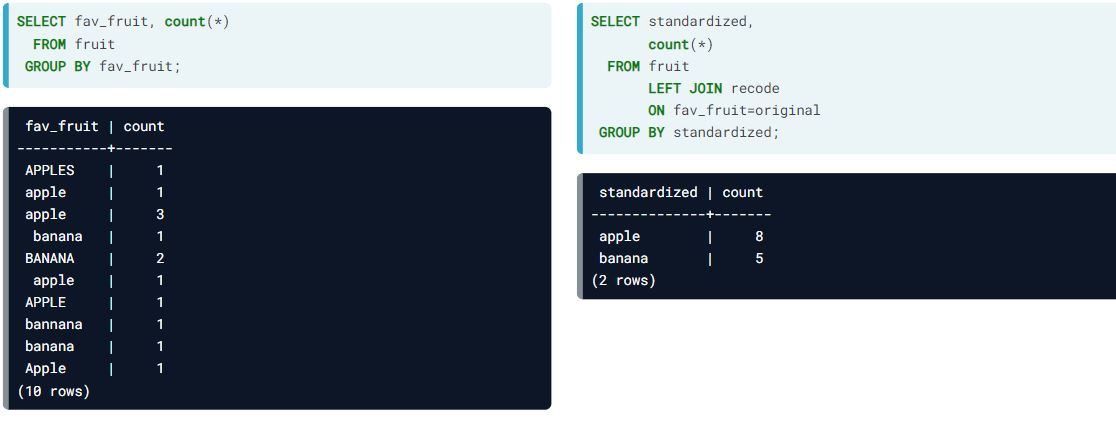

In [27]:
####

### `Recap`.
$\qquad \diamond$ `CREATE TEMP TABLE` with original values.

$\qquad \diamond$ `UPDATE` to create the `standardized` values.

$\qquad \diamond$ `JOIN` the original data to the `standardized` data.

### EXERCISEs
#### Exercise 4.1. Create an "other" category
If we want to summarize `Evanston 311` requests by `zip` code, it would be useful to group all of the low frequency zip codes together in an "other" category.

`Query`:

                    SELECT CASE WHEN zipcount < ??? THEN 'other'
                           ELSE zip
                           END AS zip_recoded,
                           sum(zipcount) AS zipsum
                      FROM (SELECT zip, count(*) AS zipcount
                              FROM evanston311
                             GROUP BY zip) AS fullcounts
                     GROUP BY zip_recoded
                     ORDER BY zipsum DESC;
`Result:`

                zip_recoded    zipsum
                60201          19054
                60202          11165
                null           5528
                other          429
                60208          255
**Which of the following values, when `substituted for ???` in the `query`, would give the result below?**
- `A`. 255
- `B`. 1000
- `C`. 100
- `D`. 60201

**Answers & comments.**

- *A. Wrong!!* Using `255` as a `cut-off` would exclude `60208` since the `query` uses `<` instead of `<=`.
- *B. Incorrect!!* A `cutoff of 1000` would include the `60208 zip code` in the `'other'` `category` instead of leaving it as a separate value.
- **C. Correct!!!** All of the `zip codes` with `fewer observations` than `60208` have less than `100 rows` in the table.
- *D. Wrong!!* `???` should be a `value of count`, **`not a zip code`**.

#### Exercise 4.2. Group and recode values
$\qquad$ There are `almost 150 distinct` values of `evanston311.category`. 

$\qquad$ But some of these categories are similar, with the form `"Main Category - Details"`. We can get a better sense of what requests are common if we `aggregate` by the `main category`.

$\qquad$ To do this, create a `temporary table`: `recode` mapping `distinct category` values to new, `standardized values`. Make the `standardized values` the part of the category before a `dash ('-')`. Extract this value with the `split_part()` function:

                        split_part(string text, delimiter text, field int)
You'll also need to do some additional cleanup of a few cases that don't fit this pattern.

Then the `evanston311` table can be joined to `recode` to group requests by the new `standardized` category values.

#### Instructions
**Step 1.** Create `recode` with a `standardized` column; use `split_part()` and then `rtrim()` to remove any remaining `whitespace` on the result of `split_part()`.

**SOLUTION.**

                DROP TABLE IF EXISTS recode;

                CREATE TEMP TABLE recode AS
                    SELECT DISTINCT category, 
                           RTRIM(SPLIT_PART(category, '-', 1)) AS standardized
                    FROM evanston311;

                SELECT DISTINCT standardized 
                FROM recode
                WHERE standardized LIKE 'Trash%Cart'
                        OR standardized LIKE 'Snow%Removal%';
- **`query result`.**

|standardized
|:-
Snow Removal
Snow Removal/Concerns
Snow/Ice/Hazard Removal
Trash Cart
Trash Cart, Recycling Cart
Trash, Recycling, Yard Waste Cart


**Step 2.**
- `UPDATE` `standardized` values `LIKE` `'Trash%Cart'` to `'Trash Cart'`.
- `UPDATE` `standardized` values of `'Snow Removal/Concerns'` and `'Snow/Ice/Hazard Removal'` to `'Snow Removal'`.

**SOLUTION.**

                    DROP TABLE IF EXISTS recode;

                    CREATE TEMP TABLE recode AS
                        SELECT DISTINCT category, 
                              rtrim(split_part(category, '-', 1)) AS standardized
                        FROM evanston311;

                    UPDATE recode       -- Update to group trash cart values
                       SET standardized = 'Trash Cart' 
                       WHERE standardized LIKE 'Trash%Cart';

                    UPDATE recode
                       SET standardized = 'Snow Removal' 
                       WHERE standardized LIKE 'Snow%Removal%';

                    -- Examine effect of updates
                    SELECT DISTINCT standardized 
                      FROM recode
                     WHERE standardized LIKE 'Trash%Cart'
                        OR standardized LIKE 'Snow%Removal%';
- **`query result`.**

|standardized
|:-
|Snow Removal
|Trash Cart

**Step 3.** `UPDATE` recode by setting standardized values of 
- `'THIS REQUEST IS INACTIVE...Trash Cart'`, 
- `'(DO NOT USE) Water Bill'`, 
- `'DO NOT USE Trash'`, and 
- `'NO LONGER IN USE'` to `'UNUSED'`.

**SOLUTION.**

                DROP TABLE IF EXISTS recode;

                CREATE TEMP TABLE recode AS
                      SELECT DISTINCT category, 
                             rtrim(split_part(category, '-', 1)) AS standardized
                      FROM evanston311;

                UPDATE recode SET standardized='Trash Cart' 
                              WHERE standardized LIKE 'Trash%Cart';
                UPDATE recode SET standardized='Snow Removal' 
                              WHERE standardized LIKE 'Snow%Removal%';


                UPDATE recode SET standardized='UNUSED' 
                             WHERE standardized IN ('THIS REQUEST IS INACTIVE...Trash Cart', 
                                                   '(DO NOT USE) Water Bill',
                                                   'DO NOT USE Trash', 
                                                   'NO LONGER IN USE');

                SELECT DISTINCT standardized FROM recode
                ORDER BY standardized;

**`query result`.**

|standardized
|:-
|ADA/Inclusion Aids
|Abandoned Bicycle on City Property
|Abandoned Vehicle
|Accessibility
|Advanced Disposal
|...
|Water Plant Tour
|Water Quality
|Water Service
|Water Service Disruption
|Yard Waste


**Step 4.** 
- Now, `join` the `evanston311` and `recode` tables to count the number of requests with each of the standardized values
- List the `most common standardized values` first.

**SOLUTION.**

                DROP TABLE IF EXISTS recode;
                CREATE TEMP TABLE recode AS
                      SELECT DISTINCT category, 
                             rtrim(split_part(category, '-', 1)) AS standardized
                      FROM evanston311;
                UPDATE recode SET standardized='Trash Cart' 
                         WHERE standardized LIKE 'Trash%Cart';
                UPDATE recode SET standardized='Snow Removal' 
                         WHERE standardized LIKE 'Snow%Removal%';
                UPDATE recode SET standardized='UNUSED' 
                         WHERE standardized IN ('THIS REQUEST IS INACTIVE...Trash Cart', 
                                                   '(DO NOT USE) Water Bill',
                                                   'DO NOT USE Trash', 'NO LONGER IN USE');

                SELECT standardized, count(*) 
                  FROM evanston311 
                       LEFT JOIN recode 
                       ON evanston311.category=recode.category 
                 GROUP BY standardized
                 ORDER BY count DESC;

- **`query result`.**

standardized|count
:-|:-
Broken Parking Meter|6092
Trash|3699
Ask A Question / Send A Message|2595
Trash Cart|1902
Tree Evaluation|1879
...|...
General Payment Question|1
Key Request|1
Line Down|1
Illegally Placed Newsrack|1
Food Waste, Collective Resource|1

- **Comments.** Awesome! You now have a strategy for recoding the values of a variable. Next, you'll use a similar approach to create some new variables.

#### Exercise 4.3. Create a table with indicator variables
Determine whether medium and high priority requests in the evanston311 data are more likely to contain requesters' contact information: an `email address` or `phone number`.

- `Emails` contain an `@`.
- `Phone numbers` have the pattern of `three characters`, `dash`, `three characters`, `dash`, `four characters`. For example: `555-555-1212`.

Use `LIKE` to match these patterns. Remember `%` matches `any number of characters` (even 0), and `_` matches a `single character`. Enclosing a pattern in `%` (i.e. before and after your pattern) allows you to locate it within other text.

For example, `'%___.com%'`would allow you to search for a reference to a website with the top-level domain `'.com'` and at least three characters preceding it.

Create and store indicator variables for email and phone in a temporary table. `LIKE` produces `True` or `False` as a result, but casting a `boolean` (`True` or `False`) as an integer converts `True` to `1` and `False` to `0`. This makes the values easier to summarize later.

#### Instructions
**Step 1.**
- Create a `temp table` indicators from `evanston311` with three columns: `id`, `email`, and `phone`.
- Use `LIKE` comparisons to detect the email and phone patterns that are in the `description`, and cast the result as an integer with `CAST()`.
- Your phone indicator should use a combination of `underscores _` and `dashes -` to represent a `standard 10-digit phone number` format.
- Remember to start and end your patterns with `%` so that you can locate the pattern within other `text`!

**SOLUTION.**

            DROP TABLE IF EXISTS indicators;
            CREATE TEMP TABLE indicators AS
                    SELECT id, 
                           CAST (description LIKE '%@%' AS integer) AS email,
                           CAST (description LIKE '%___-___-___%' AS integer) AS phone 
                    FROM evanston311;
            SELECT * FROM indicators;

**Step 2.**
- `Join` the indicators table to `evanston311`, selecting the proportion of reports including an email or phone grouped by priority.
- Include adjustments to account for issues arising from `integer division`.

**SOLUTION.**

                    DROP TABLE IF EXISTS indicators;

                    CREATE TEMP TABLE indicators AS
                          SELECT id, 
                                 CAST (description LIKE '%@%' AS integer) AS email,
                                 CAST (description LIKE '%___-___-____%' AS integer) AS phone 
                            FROM evanston311;

                    SELECT priority, 
                           sum(email)/count(*)::numeric AS email_prop, 
                           sum(phone)/count(*)::numeric AS phone_prop 
                      FROM evanston311
                           LEFT JOIN indicators
                               ON evanston311.id=indicators.id
                    GROUP BY priority;
- **`query result`.**

priority|email_prop|phone_prop
:-|:-|:-
MEDIUM|0.01966927763272410792|0.01845082680591818973
NONE|0.00412220338419600412|0.00568465144110900568
HIGH|0.01136363636363636364|0.02272727272727272727
LOW|0.00580270793036750484|0.00193423597678916828

- **Comments.** Medium and high priority requests do contain contact information more frequently. 